# Notebook IV - Soil Constraints

<hr>
This module, after applying climatic constraints, will be continued to apply yield reduction due to soil constraints. Soil constraints works with combination of seven soil qualities into soil ratings (a single yield reduction factor). This module works with soil properties provided from soil map and each soil mapping unit's unique physical and chemical properties as csv file format.

Prepared by Geoinformatics Center, AIT
<hr>

### Google drive connection
In this step, we will connect to Google Drive service and mount the drive where we will start our PyAEZ project

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

Then, installing any additional python packages that required to run PyAEZ.
If working on your own PC/machine, these additional installation will vary depending on what is already installed in your Python library. 

In [ ]:
# 'Installing neccessary packages'
# !pip install gdal

## Importing Libraries

In [1]:
'''import supporting libraries'''
# import pyaez
import matplotlib.pyplot as plt
import numpy as np
import os
try:
    from osgeo import gdal
except:
    import gdal
import sys

Setting the working directory -- where our PyAEZ project is located.

In [2]:
'Set the working directory'
work_dir = r'D:\PyAEZv2.1_Draft'  # Please change this to your working directory
os.chdir(work_dir)
sys.path.append('./pyaez/')
os.getcwd()


'pwd' is not recognized as an internal or external command,
operable program or batch file.


Check and create data output folder

In [ ]:
import os
folder_path = './data_output/NB4/'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print("Folder created successfully.")
else:
    print("Folder already exists.")


Folder created successfully.


## Applying Soil Constraints

In [3]:
'''importing library'''

from pyaez import SoilConstraints
soil_constraints = SoilConstraints.SoilConstraints()

from pyaez import UtilitiesCalc
obj_utilities = UtilitiesCalc.UtilitiesCalc()

In [4]:
'''reading data'''

yield_map_rain = gdal.Open('./data_output/NB3/clim_maiz_yield_rain.tif').ReadAsArray()
yield_map_irr = gdal.Open('./data_output/NB3/clim_maiz_yield_irr.tif').ReadAsArray()

soil_map = gdal.Open('./data_input/Lao_Soil.tif').ReadAsArray()

In [7]:
'''calculate soil qualities and ratings and applying soil constraints - Rain-fed'''

soil_constraints.calculateSoilQualities('R', topsoil_path= r'./data_input/soil_characteristics_topsoil.csv',
                                         subsoil_path= r'./data_input/soil_characteristics_subsoil.csv') # I: Irrigated, R: Rain-fed
soil_constraints.calculateSoilRatings('H') # L: Low, I: Intermediate, H: High input

# extraction of soil qualities and soil rating if required
# print( soil_constraints.getSoilQualities() )
# print( soil_constraints.getSoilRatings() )

yield_map_rain_m4 = soil_constraints.applySoilConstraints(soil_map, yield_map_rain)
## get classified output
yield_map_rain_class_m4 = obj_utilities.classifyFinalYield(yield_map_rain_m4)

Text(0.5, 1.0, 'Soil Constrainted Rainfed Yield Maize')

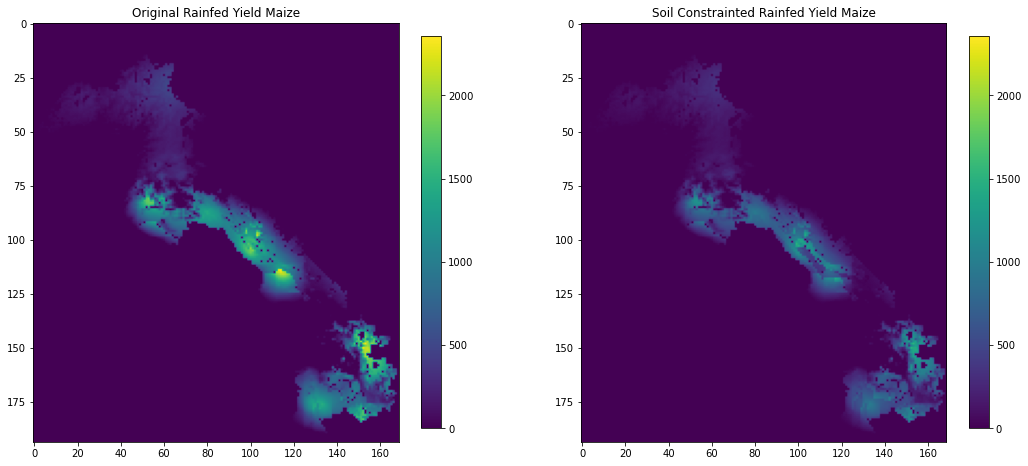

In [11]:
'''visualize results'''
plt.figure(1, figsize=(18,9))
plt.subplot(1,2,1)
plt.imshow(yield_map_rain, vmax = np.max([yield_map_rain_m4, yield_map_rain]))
plt.colorbar(shrink=0.8)
plt.title('Original Rainfed Yield Maize')

plt.subplot(1,2,2)
plt.imshow(yield_map_rain_m4, vmax = np.max([yield_map_rain_m4, yield_map_rain]))
plt.colorbar(shrink=0.8)
plt.title('Soil Constrainted Rainfed Yield Maize')



In [12]:
'''calculate soil qualities and ratings and applying soil constraints - Irrigated'''

soil_constraints.calculateSoilQualities('I', topsoil_path= r'./data_input/soil_characteristics_topsoil.csv',
                                         subsoil_path= r'./data_input/soil_characteristics_subsoil.csv') # I: Irrigated, R: Rain-fed
soil_constraints.calculateSoilRatings('H') # L: Low, I: Intermediate, H: High input

# extraction of soil qualities and soil rating if required
# print( soil_constraints.getSoilQualities() )
# print( soil_constraints.getSoilRatings() )

yield_map_irr_m4 = soil_constraints.applySoilConstraints(soil_map, yield_map_irr, )
## get classified output
yield_map_irr_class_m4 = obj_utilities.classifyFinalYield(yield_map_irr_m4)

Text(0.5, 1.0, 'Soil Constrainted Irrigated Yield Maize')

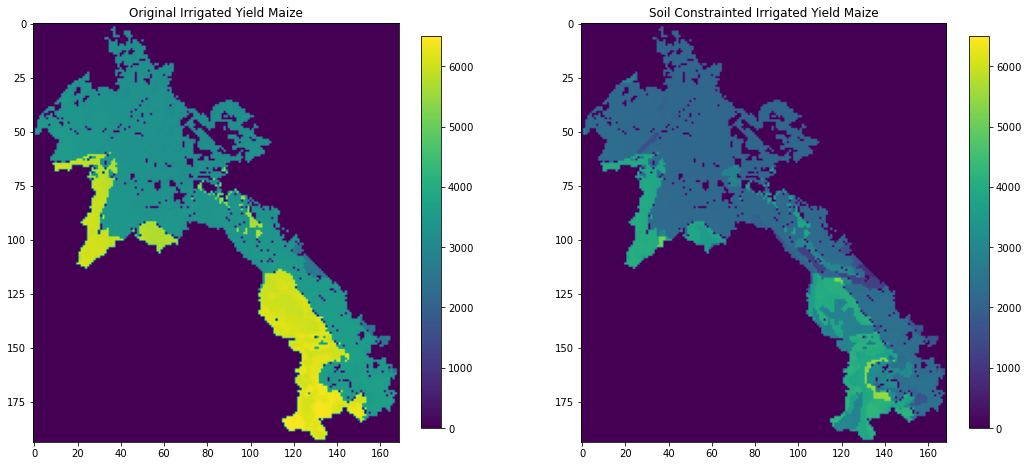

In [13]:
'''visualize results'''
plt.figure(1, figsize=(18,9))
plt.subplot(1,2,1)
plt.imshow(yield_map_irr, vmax = np.max([yield_map_irr_m4, yield_map_irr]))
plt.colorbar(shrink=0.8)
plt.title('Original Irrigated Yield Maize')

plt.subplot(1,2,2)
plt.imshow(yield_map_irr_m4, vmax = np.max([yield_map_irr_m4, yield_map_irr]))
plt.colorbar(shrink=0.8)
plt.title('Soil Constrainted Irrigated Yield Maize')

In [14]:
'''save result'''

obj_utilities.saveRaster('./data_input/LAO_Admin.tif', './data_output/NB4/soil_clim_adj_yield_maiz_rain.tif', yield_map_rain_m4)
obj_utilities.saveRaster('./data_input/LAO_Admin.tif', './data_output/NB4/soil_clim_adj_yield_maiz_irr.tif', yield_map_irr_m4)

obj_utilities.saveRaster('./data_input/LAO_Admin.tif', './data_output/NB4/soil_clim_adj_yield_maiz_rain_class.tif',yield_map_rain_class_m4)
obj_utilities.saveRaster('./data_input/LAO_Admin.tif', './data_output/NB4/soil_clim_adj_yield_maiz_irr_class.tif',yield_map_irr_class_m4)

<hr>

### END OF MODULE 4: SOIL CONSTRAINTS

<hr>